In [72]:
# DIAGNOSYS OF CHRONIC KIDNEY DISEASE USING EFFECTIVE CLASSIFICATION ALGORITHMS AND 
    # RECURSIVE FEATURE SELECTION ALGORITHMS

In [73]:
import numpy as np


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('kidney_disease.csv')
print(data)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [75]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [76]:
data.shape

(400, 26)

In [77]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [79]:
data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [80]:
data.classification=data.classification.replace("ckd\t","ckd") 

In [81]:
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [82]:
data.drop('id', axis = 1, inplace = True)

In [83]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [84]:
# converting the values of dependent(classification) variables to 0's and 1's

data['classification'] = data['classification'].replace(['ckd','notckd'], [1,0])

In [85]:
data.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [86]:
# printing the null values

data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [87]:
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data_imputed=pd.DataFrame(imp_mode.fit_transform(data))
data_imputed.columns=data.columns
data_imputed

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,99.0,...,38,6000,5.2,no,no,no,good,no,no,1
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,5.2,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,0
397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,0


In [88]:
data_imputed.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [89]:
df=data_imputed
#df = data.dropna(axis = 0)
print(f"Before imputing all NaN values: {data.shape}")
print(f"After imputing all NaN values: {df.shape}")
df.isna().sum()

Before imputing all NaN values: (400, 25)
After imputing all NaN values: (400, 25)


age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [90]:
# df.index = range(0,len(df),1)
# df.head()

In [91]:
from sklearn.metrics import accuracy_score,confusion_matrix
df.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,0
397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,0
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,0


In [92]:
df.shape

(400, 25)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             400 non-null    object
 1   bp              400 non-null    object
 2   sg              400 non-null    object
 3   al              400 non-null    object
 4   su              400 non-null    object
 5   rbc             400 non-null    object
 6   pc              400 non-null    object
 7   pcc             400 non-null    object
 8   ba              400 non-null    object
 9   bgr             400 non-null    object
 10  bu              400 non-null    object
 11  sc              400 non-null    object
 12  sod             400 non-null    object
 13  pot             400 non-null    object
 14  hemo            400 non-null    object
 15  pcv             400 non-null    object
 16  wc              400 non-null    object
 17  rc              400 non-null    object
 18  htn       

In [94]:
# Statistical measures of data

# df.describe()

In [95]:
# Checking the distrubution of target variable

df['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

In [96]:
# grouping the data based on the target variable

df.groupby('classification').mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_12300\4260648273.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df.groupby('classification').mean()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
classification,,,,,,,,,,,
0,46.606667,71.466667,1.022333,0.00,0.000,107.373333,33.326667,0.8800,141.506667,4.3100,15.180667
1,54.716000,79.640000,1.014940,1.44,0.632,163.804000,71.016800,4.2606,134.262000,4.4208,11.448400


In [97]:
# Finding unique value in the columns

for i in df.columns:
    print("*******************************",i,"****************************************")
    print()
    print(set(df[i].tolist()))

******************************* age ****************************************

{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0}
******************************* bp ****************************************

{100.0, 70.0, 140.0, 110.0, 80.0, 50.0, 180.0, 120.0, 90.0, 60.0}
******************************* sg ****************************************

{1.02, 1.025, 1.005, 1.015, 1.01}
******************************* al ****************************************

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}
******************************* su ****************************************

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}
**

In [98]:
print(set(df["rc"].tolist()))
print()
print(set(df["wc"].tolist()))
print()
print(set(df["pcv"].tolist()))

{'5.1', '3', '4.8', '3.1', '3.2', '5.8', '3.9', '6.1', '8.0', '2.3', '5.2', '5.7', '4.1', '4', '4.4', '6.3', '3.4', '5', '5.3', '2.8', '3.7', '5.6', '6.2', '6.0', '4.7', '\t?', '5.0', '4.3', '4.2', '2.9', '4.6', '4.0', '4.5', '2.4', '4.9', '3.5', '5.4', '3.3', '6.4', '2.1', '2.7', '2.6', '2.5', '5.5', '3.6', '3.0', '5.9', '6.5', '3.8'}

{'10200', '12100', '10400', '7800', '\t6200', '10500', '14900', '9900', '11400', '21600', '11200', '5300', '4700', '5400', '6500', '10800', '9300', '16300', '3800', '6900', '2200', '7300', '4900', '7200', '8500', '12200', '16700', '6200', '5100', '6300', '11500', '26400', '9000', '6800', '9400', '12800', '4200', '\t8400', '18900', '6700', '15200', '\t?', '11800', '8200', '5900', '9200', '5800', '11900', '13200', '6400', '10300', '7700', '12400', '9600', '7100', '13600', '12500', '5600', '8000', '19100', '4500', '6000', '7500', '10700', '6600', '5200', '9500', '15700', '10900', '4300', '8400', '11000', '12000', '8100', '7400', '2600', '5700', '8800', '97

In [99]:
# Which are numerical mistaken values so we will replace this with mode

print(df["rc"].mode())
print(df["wc"].mode())
print(df["pcv"].mode())

0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


In [100]:
df["cad"]=df["cad"].apply(lambda x:'no' if x=="\tno" else x)

df["dm"]=df["dm"].apply(lambda x:'no' if x=="\tno" else x)
df["dm"]=df["dm"].apply(lambda x:'yes' if x=="\tyes" else x)
df["dm"]=df["dm"].apply(lambda x:'yes' if x==" yes" else x)

df["rc"]=df["rc"].apply(lambda x:'5.2' if x=="\t?" else x)

df["wc"]=df["wc"].apply(lambda x:'9800' if x=="\t6200" else x)
df["wc"]=df["wc"].apply(lambda x:'9800' if x=="\t8400" else x)
df["wc"]=df["rc"].apply(lambda x:'9800' if x=="\t?" else x)

df["pcv"]=df["pcv"].apply(lambda x:'41' if x=="\t?" else x)
df["pcv"]=df["rc"].apply(lambda x:'41' if x=="\t43" else x)

AxesSubplot(0.125,0.11;0.775x0.77)


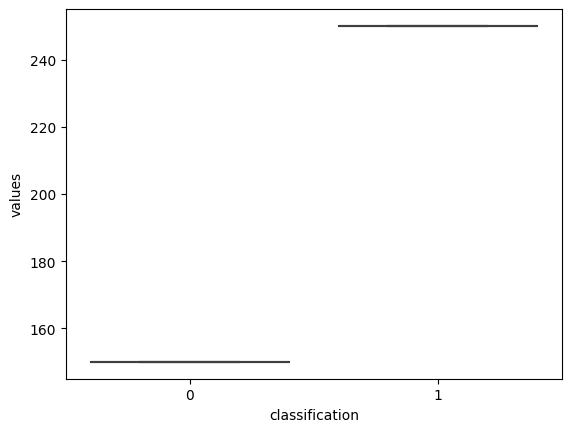

In [101]:
# check label imbalance

import matplotlib.pyplot as plt
import seaborn as sns
temp=df["classification"].value_counts()
temp_df=pd.DataFrame({'classification':temp.index,'values':temp.values})
print(sns.boxplot(x='classification',y='values',data=temp_df))

In [102]:
df['classification'].value_counts()


1    250
0    150
Name: classification, dtype: int64

In [103]:
data.dtypes


age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification      int64
dtype: object

In [104]:
df.dtypes

age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [105]:
# we are figuring out the columns in the data which are not object

for i in data.select_dtypes(exclude=["object"]).columns:
    df[i]=df[i].apply(lambda x: float(x))

In [106]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification    float64
dtype: object

In [107]:
# Optional
# sns.pairplot(df)

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


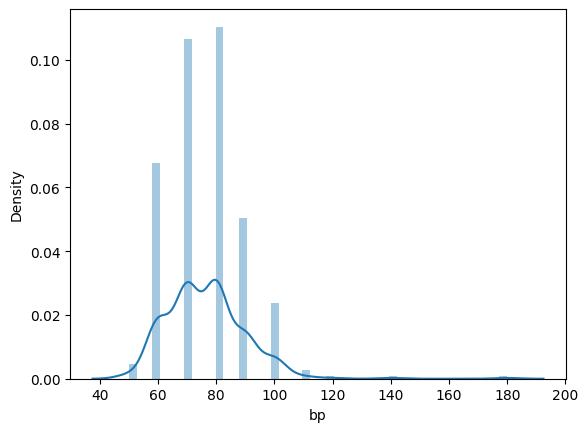

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


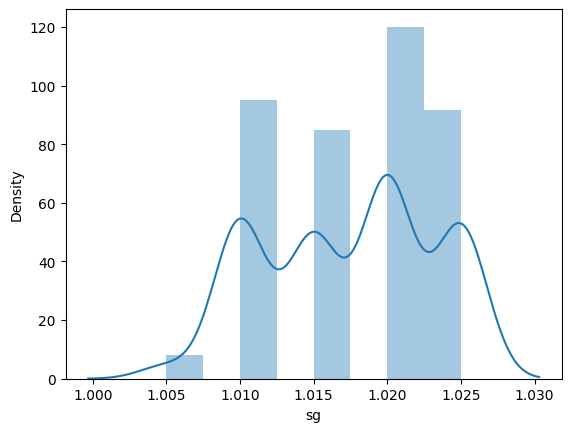

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


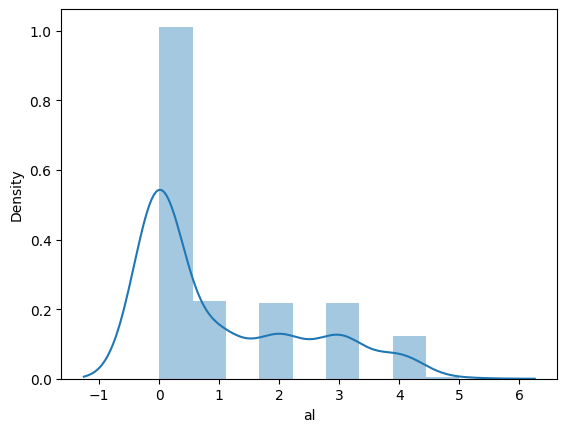

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


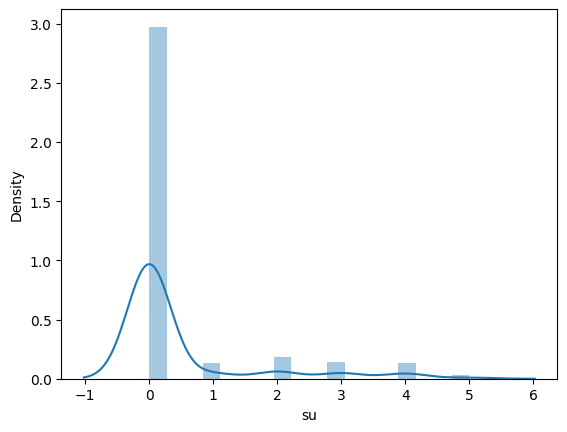

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


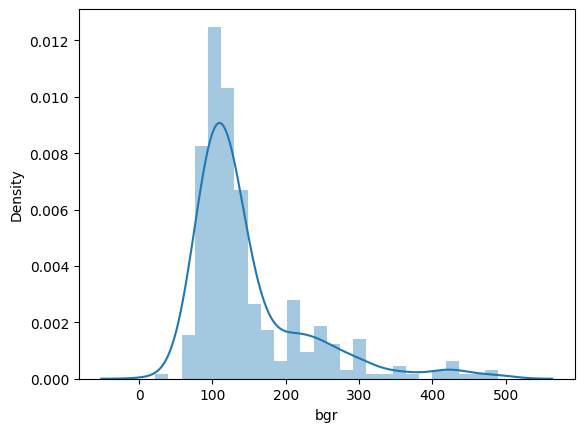

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


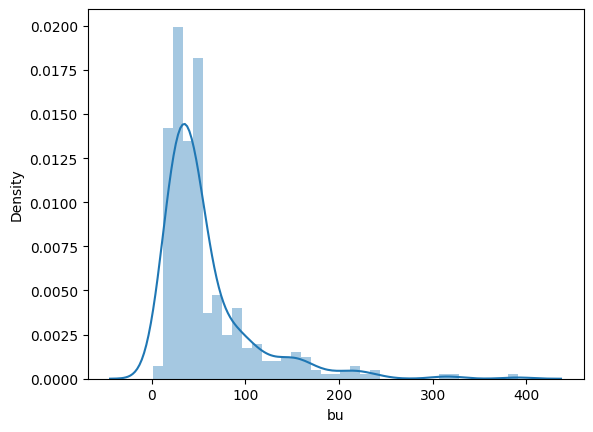

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


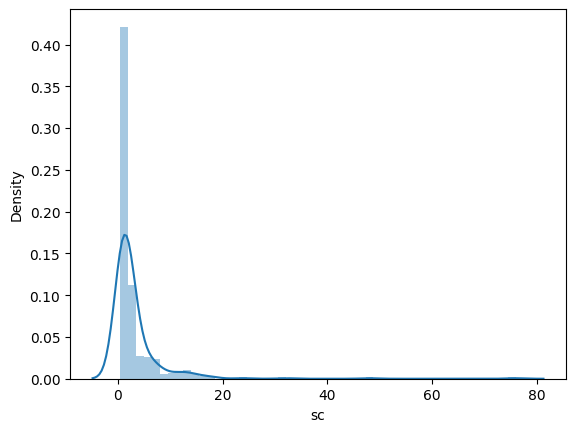

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


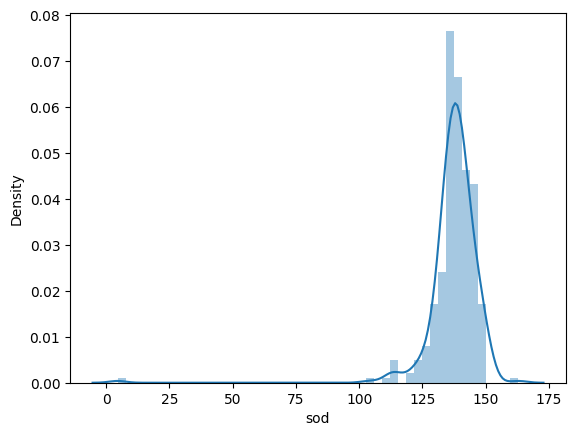

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


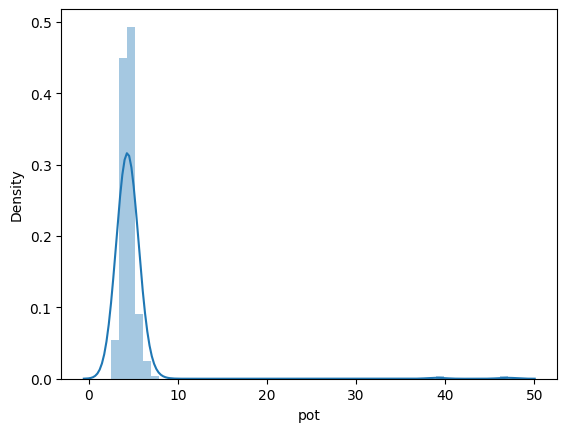

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


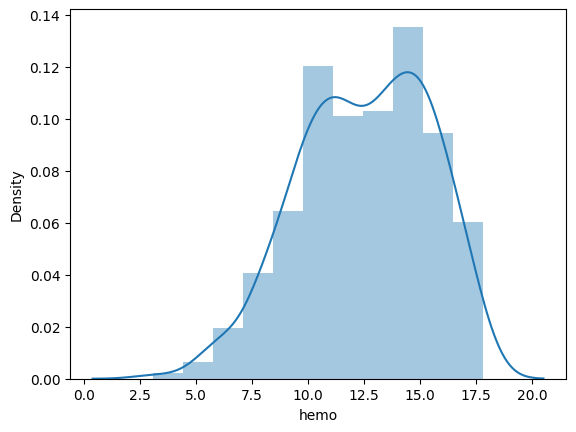

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


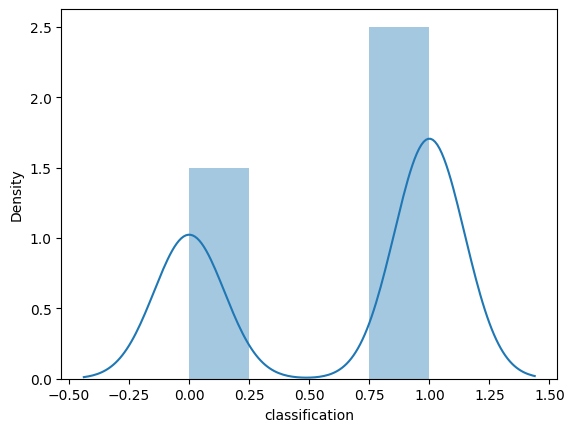

In [108]:
# Find the distribution of data 

def distplots(col):
    sns.distplot(data[col])
    plt.show()

for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


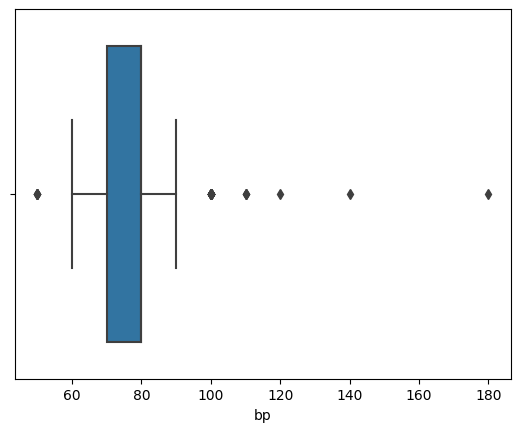

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


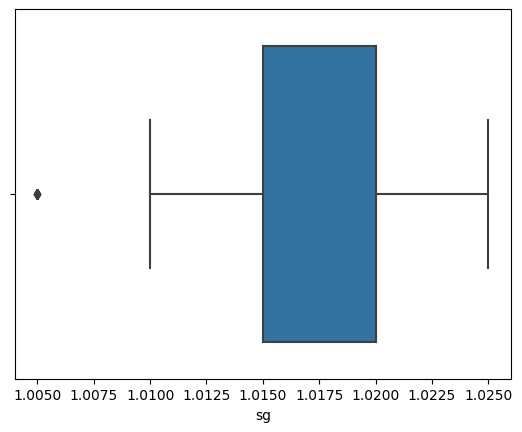

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


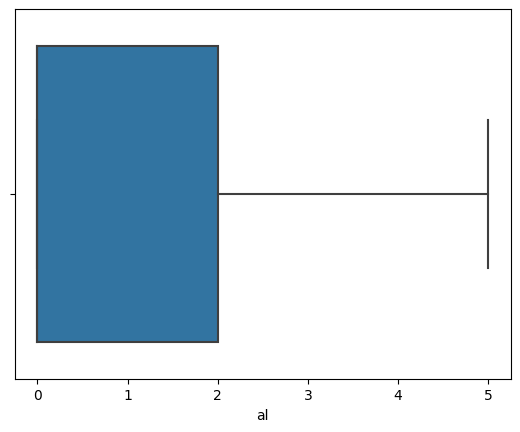

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


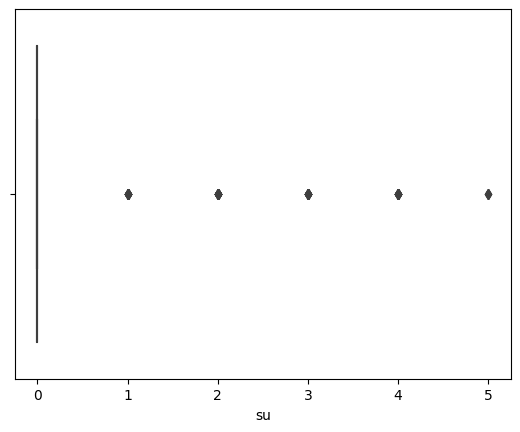

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


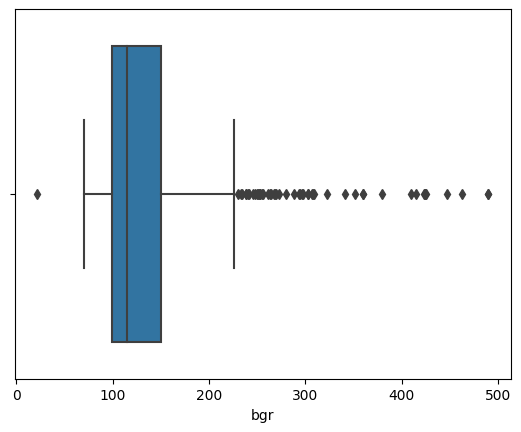

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


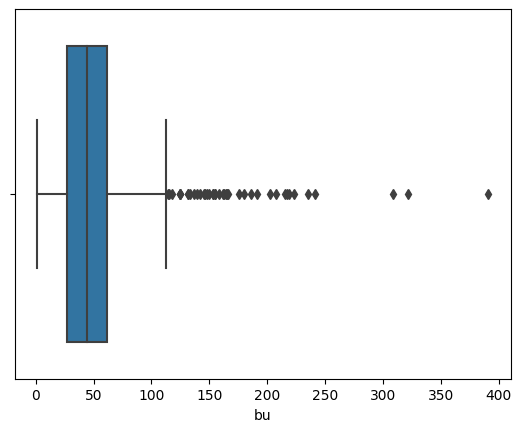

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


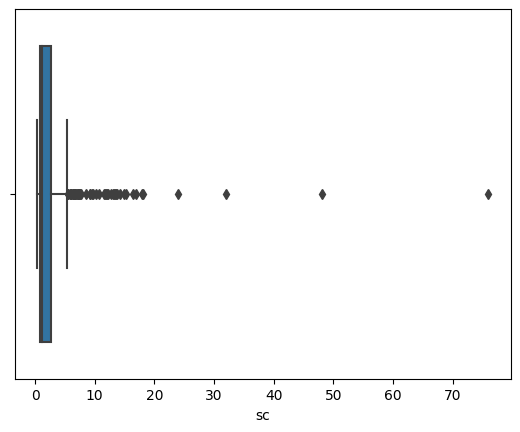

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


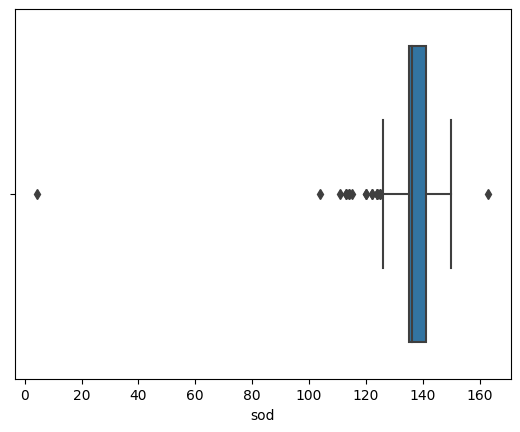

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


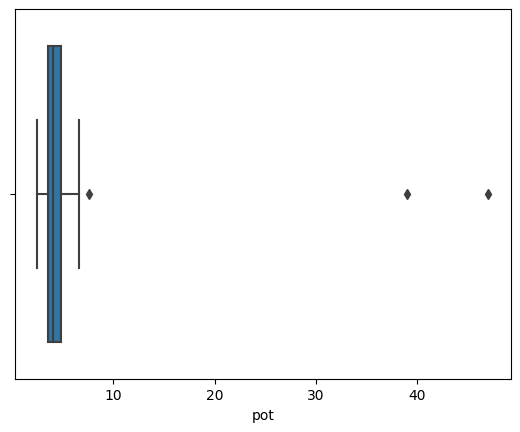

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


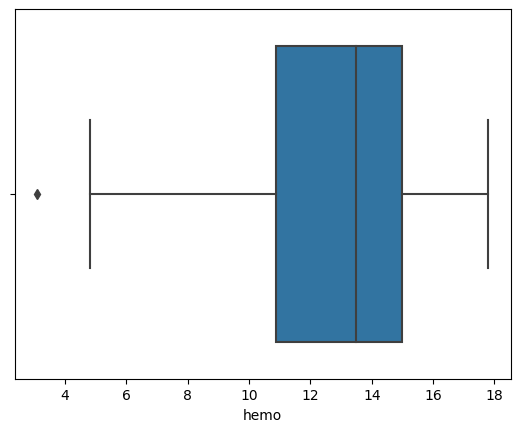

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


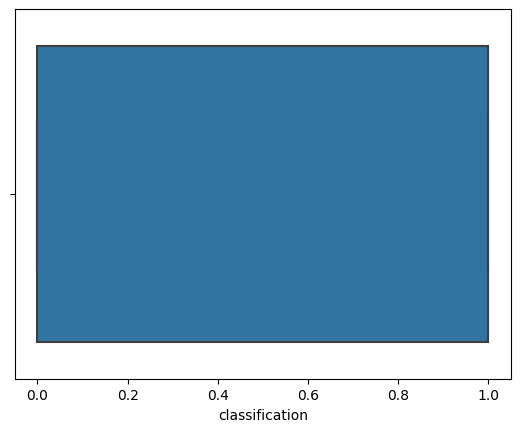

In [109]:
# Find and remove Outliers

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

In [110]:
# Final step of Preprocessing we have to encode the data since there are categorical and numerical we use label encoder

from sklearn import preprocessing

df_enco=df.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,40,3,3,1,0,1,1,0,0,48,...,33,33,33,1,1,0,0,0,0,1
1,5,0,3,4,0,1,1,0,0,26,...,33,33,33,0,0,0,0,0,0,1
2,54,3,1,2,3,1,1,0,0,140,...,33,33,33,0,1,0,1,0,1,1
3,40,2,0,4,0,1,0,1,0,44,...,18,18,18,1,0,0,1,1,1,1
4,43,3,1,2,0,1,1,0,0,33,...,26,26,26,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,47,3,3,0,0,1,1,0,0,64,...,29,29,29,0,0,0,0,0,0,0
396,34,2,4,0,0,1,1,0,0,3,...,43,43,43,0,0,0,0,0,0,0
397,8,3,3,0,0,1,1,0,0,27,...,35,35,35,0,0,0,0,0,0,0
398,11,1,4,0,0,1,1,0,0,41,...,40,40,40,0,0,0,0,0,0,0


In [111]:
df_enco.to_csv("kidney_disease_Pre_Processed.csv")

<AxesSubplot:>

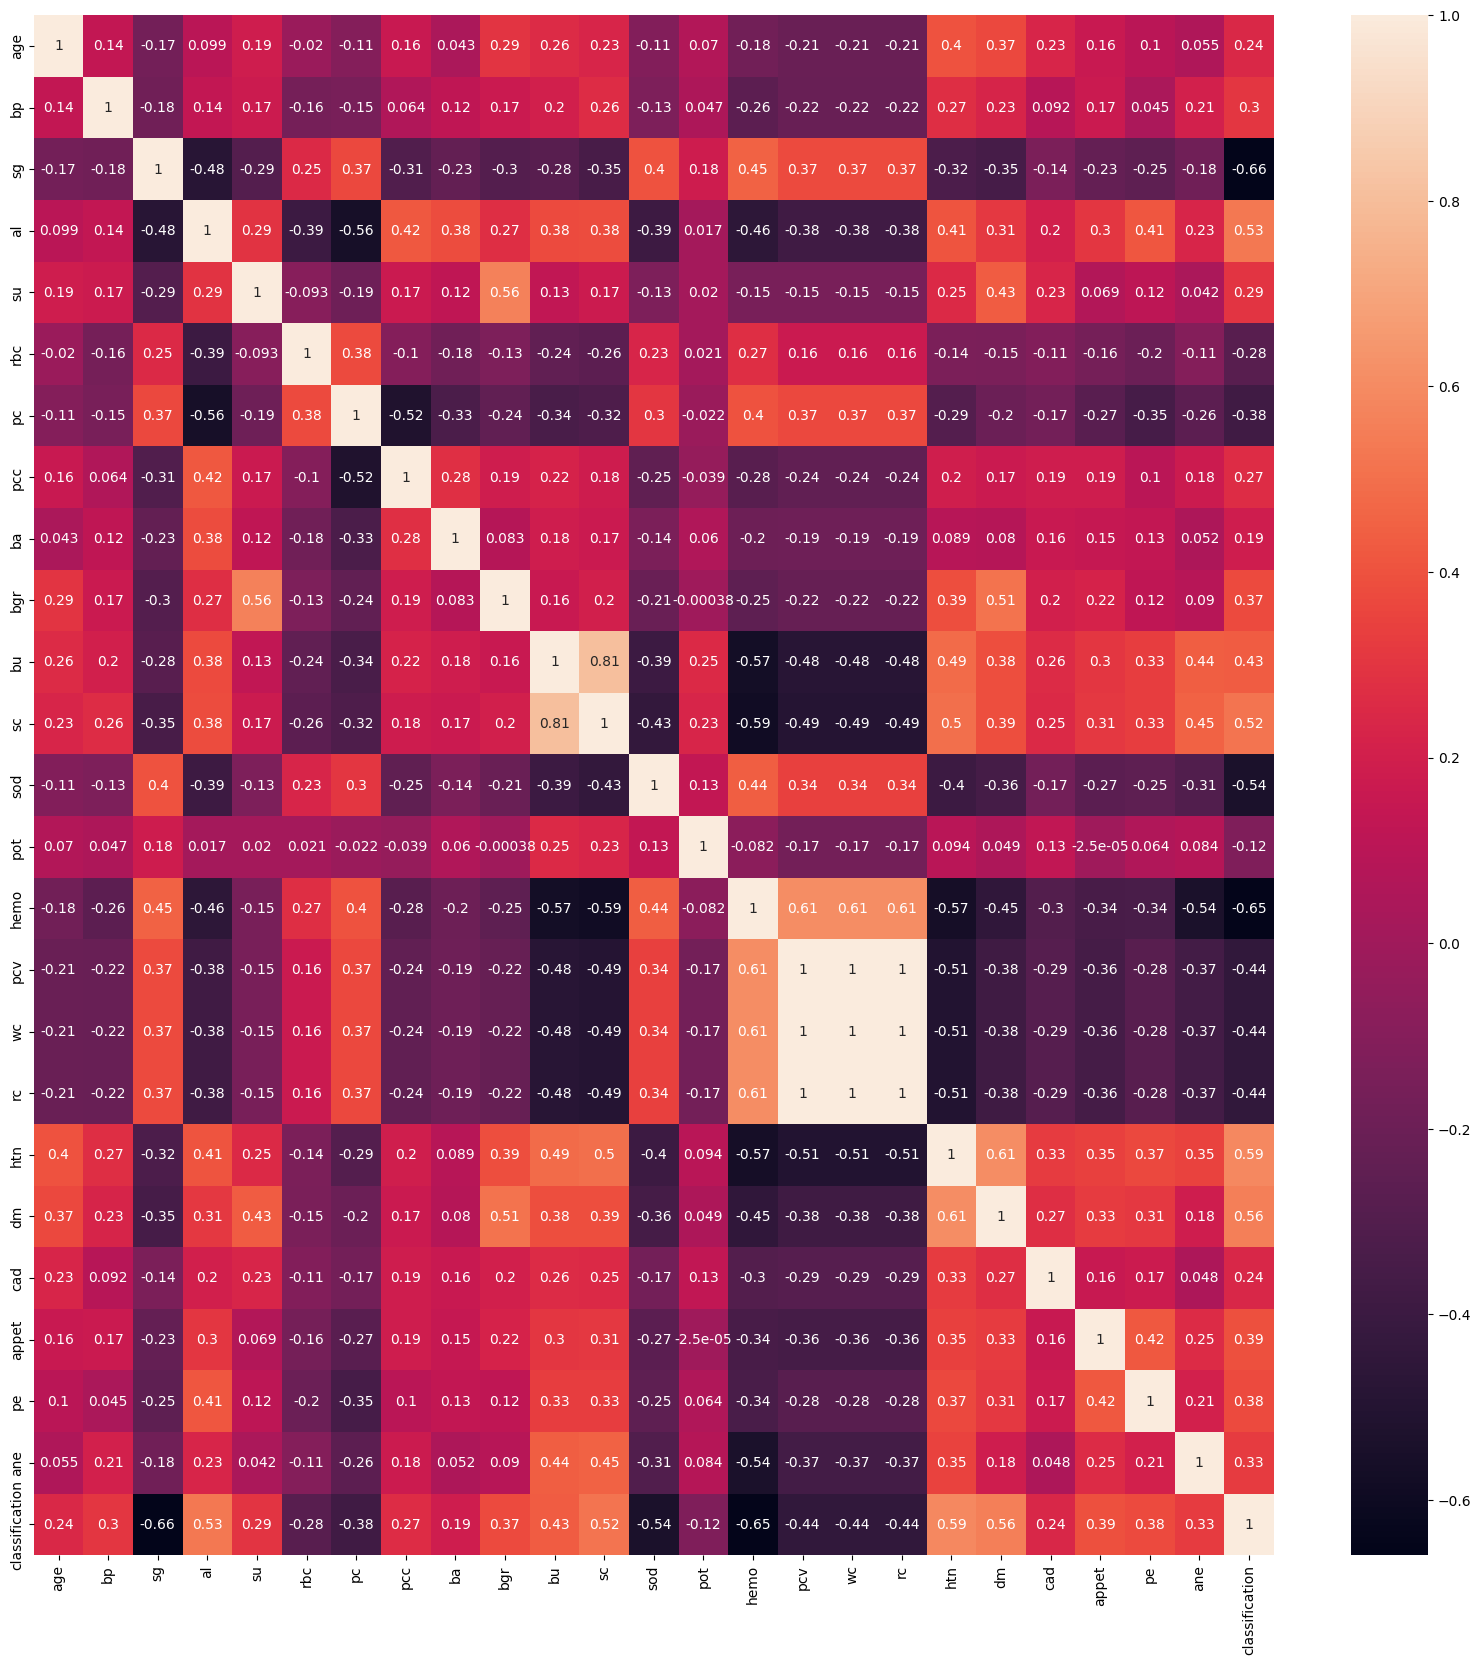

In [112]:
# Finding correlation

plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr,annot=True)

In [113]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [114]:
# Final Changes to be made

# Seperate deprndent and Independent variables


x=df_enco.drop(["classification"],axis=1)

y=df_enco["classification"]

from sklearn.decomposition import PCA
pca=PCA(.95)
x_pca=pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(400, 24)
(400, 5)


In [115]:
rfe=RFE(estimator=DecisionTreeClassifier(),n_features_to_select=8)
rfe.fit(x,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)

In [116]:
for i, col in zip(range(x.shape[1]),x.columns):
    print(f"{col} selected = {rfe.support_[i]} rank = {rfe.ranking_[i]}")

age selected = False rank = 17
bp selected = False rank = 16
sg selected = True rank = 1
al selected = True rank = 1
su selected = False rank = 8
rbc selected = False rank = 9
pc selected = False rank = 7
pcc selected = False rank = 6
ba selected = False rank = 5
bgr selected = False rank = 4
bu selected = False rank = 11
sc selected = True rank = 1
sod selected = False rank = 15
pot selected = False rank = 14
hemo selected = True rank = 1
pcv selected = False rank = 3
wc selected = False rank = 2
rc selected = True rank = 1
htn selected = True rank = 1
dm selected = True rank = 1
cad selected = True rank = 1
appet selected = False rank = 10
pe selected = False rank = 12
ane selected = False rank = 13


In [117]:
# modifying the feayures accorfing to the RFE

x=x.drop(["age","bp","su","rbc","pc","pcc","ba","bgr","bu","sod","pot","pcv","wc","appet","pe","ane"],axis=1)

In [118]:
# Detecting the label balance
#from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSample


from collections import Counter
print(Counter(y))

Counter({1: 250, 0: 150})


In [119]:
print(x)
print(y)

     sg  al  sc  hemo  rc  htn  dm  cad
0     3   1   8    90  33    1   1    0
1     3   4   4    49  33    0   0    0
2     1   2  14    32  33    0   1    0
3     0   4  32    48  18    1   0    0
4     1   2  10    52  26    0   0    0
..   ..  ..  ..   ...  ..  ...  ..  ...
395   3   0   1    93  29    0   0    0
396   4   0   8   101  43    0   0    0
397   3   0   2    94  35    0   0    0
398   4   0   6    78  40    0   0    0
399   4   0   7    94  42    0   0    0

[400 rows x 8 columns]
0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(X_train)
print(X_test)

scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# print(X_train)
# print(X_test)


     sg  al  sc  hemo  rc  htn  dm  cad
205   3   0  17    62  33    1   1    0
354   4   0   0    82  32    0   0    0
3     0   4  32    48  18    1   0    0
264   3   0   3    80  25    0   0    0
194   1   2   8    86  33    1   1    0
..   ..  ..  ..   ...  ..  ...  ..  ...
299   3   0   1    87  27    0   0    0
22    4   4  54    34  13    1   0    0
72    1   3   9    39  33    1   1    0
15    2   3  58    14   6    1   0    0
168   2   4  11    46  33    1   1    0

[320 rows x 8 columns]
     sg  al  sc  hemo  rc  htn  dm  cad
94    1   0  12    52  18    0   1    0
32    1   1  11    49  20    1   1    0
225   1   3  23    51  25    1   1    0
157   4   3  13    62  18    1   1    0
356   4   0   1   107  42    0   0    0
..   ..  ..  ..   ...  ..  ...  ..  ...
188   3   0  21    58  33    0   0    0
223   1   0   9    66  26    1   1    0
65    1   1   7    86  33    0   0    0
262   3   0   5    91  35    0   0    0
186   3   4   6    86  33    0   0    0

[80 rows x 8 co

In [121]:
print(X_train)
print()
print(X_test)

[[ 0.43324389 -0.67545419 -0.05208507 ...  1.30838236  1.41090546
  -0.32751555]
 [ 1.36370057 -0.67545419 -0.93203165 ... -0.76430257 -0.70876471
  -0.32751555]
 [-2.35812614  2.41233639  0.72433838 ...  1.30838236 -0.70876471
  -0.32751555]
 ...
 [-1.42766946  1.64038874 -0.46617758 ...  1.30838236  1.41090546
  -0.32751555]
 [-0.49721279  1.64038874  2.07013903 ...  1.30838236 -0.70876471
  -0.32751555]
 [-0.49721279  2.41233639 -0.36265445 ...  1.30838236  1.41090546
  -0.32751555]]

[[-1.42766946 -0.67545419 -0.31089289 -0.47218612 -1.16987512 -0.76430257
   1.41090546 -0.32751555]
 [-1.42766946  0.09649346 -0.36265445 -0.58107363 -0.95783319  1.30838236
   1.41090546 -0.32751555]
 [-1.42766946  1.64038874  0.25848431 -0.50848196 -0.42772834  1.30838236
   1.41090546 -0.32751555]
 [ 1.36370057  1.64038874 -0.25913133 -0.10922778 -1.16987512  1.30838236
   1.41090546 -0.32751555]
 [ 1.36370057 -0.67545419 -0.88027009  1.52408478  1.37462812 -0.76430257
  -0.70876471 -0.32751555]
 [

In [122]:
# from sklearn.decomposition import PCA
# pca=PCA(.95)
# x_pca=pca.fit_transform(x)
# print(x.shape)
# print(x_pca.shape)

In [123]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svm_model=SVC()
svm_model.fit(X_train,Y_train)


SVC()

In [124]:
# accuracy score of training

X_train_prediction=svm_model.predict(X_train)
svm_train_accuracy=accuracy_score(Y_train,X_train_prediction)
print('Accuracy_score of Training data : ',svm_train_accuracy)

Accuracy_score of Training data :  0.975


In [125]:
# Accuracy score of testing data

X_test_prediction=svm_model.predict(X_test)
svm_test_accuracy=accuracy_score(Y_test,X_test_prediction)
print('Accuracy_score of Testing data : ',svm_train_accuracy)

confusion_matrix(Y_test, X_test_prediction)

Accuracy_score of Testing data :  0.975


array([[26,  0],
       [ 2, 52]], dtype=int64)

In [126]:
# Random Forest Classifer

from sklearn.ensemble import RandomForestClassifier
RandomForest_Model = RandomForestClassifier(n_estimators = 20)
RandomForest_Model.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=20)

In [127]:
# confusion_matrix(Y_test, RandomForest_Model.predict(X_test))
print(f"Accuracy using Random Forest Classifier is  {round(accuracy_score(Y_test, RandomForest_Model.predict(X_test))*100, 2)}%")

confusion_matrix(Y_test, RandomForest_Model.predict(X_test))

Accuracy using Random Forest Classifier is  100.0%


array([[26,  0],
       [ 0, 54]], dtype=int64)

In [128]:
# Naivebayes Algorithm

from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, Y_train)

GaussianNB()

In [129]:
confusion_matrix(Y_test, NaiveBayes.predict(X_test))

array([[26,  0],
       [ 4, 50]], dtype=int64)

In [130]:
print(f"Accuracy using Naive Bayes calssifier is  {round(accuracy_score(Y_test, NaiveBayes.predict(X_test))*100, 2)}%")

Accuracy using Naive Bayes calssifier is  95.0%


In [131]:
#  Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [132]:
confusion_matrix(Y_test, DecisionTree.predict(X_test))
print(f"Accuracy using Decision Tree calssifier is  {round(accuracy_score(Y_test, DecisionTree.predict(X_test))*100, 2)}%")
confusion_matrix(Y_test, DecisionTree.predict(X_test))

Accuracy using Decision Tree calssifier is  100.0%


array([[26,  0],
       [ 0, 54]], dtype=int64)

In [133]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, Y_train) 

KNeighborsClassifier()

In [134]:
print(f"Accuracy using KNN calssifier is  {round(accuracy_score(Y_test, classifier.predict(X_test))*100, 2)}%")
confusion_matrix(Y_test, classifier.predict(X_test))

Accuracy using KNN calssifier is  96.25%


array([[26,  0],
       [ 3, 51]], dtype=int64)

In [135]:
from sklearn.linear_model import LogisticRegression
Logistic_reg=LogisticRegression()
Logistic_reg.fit(X_train,Y_train)

LogisticRegression()

In [136]:
print(f"Accuracy using Logistic regression  is  {round(accuracy_score(Y_test, Logistic_reg.predict(X_test))*100, 2)}%")
confusion_matrix(Y_test, Logistic_reg.predict(X_test))

Accuracy using Logistic regression  is  97.5%


array([[26,  0],
       [ 2, 52]], dtype=int64)

In [137]:
input_data=(3,1,19,3,33,33,1,1)
# here the abpve inputs are sg,al,sc,hemo,rc,htn,dm,cad which are taken from processed file

# changing the input data into numpy array

input_data_as_numpy_array=np.asarray(input_data)

# reshaping the numpy array

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# Standardising the data

std_data=scaler.transform(input_data_reshaped)
prediction=RandomForest_Model.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print("The person doesn't have Chronic kidney Disease")
else:
    print("The person have Chronic Kidney Disease")

[1]
The person have Chronic Kidney Disease


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [138]:
import pickle

filename='Chronic_Kidney_File.pkl'
pickle.dump(RandomForest_Model,open(filename,"wb"))

In [139]:
# loading the saved model

loaded_model=pickle.load(open('Chronic_kidney_File.pkl','rb'))